In [64]:
## Import the necessary Libraries 
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [65]:
#  Read the data set and load it into a data frame
df = pd.read_csv("vehicle.csv")

### Q1: Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [66]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [68]:
df.shape

(846, 19)

In [69]:
##null values distribution across columns within the data set
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Findings:
There are 846 rows present in the data set with 19 Columns for each row.
18 Columns have non categorical datatype. (int64 and float64)

In [70]:
### Data treatment

## copy the original data frame to a new data frame
vehicles_df = df.copy()

## replacing the null values with the corresponding median
for cols in vehicles_df.columns:
    if (vehicles_df[cols].dtypes == np.float64):
        vehicles_df[cols] = vehicles_df[cols].fillna(vehicles_df[cols].median())
        vehicles_df[cols] = vehicles_df[cols].astype('int64') ## change the float64 to int64 required for distplot
    if (vehicles_df[cols].dtypes == np.int64):
        vehicles_df[cols] = vehicles_df[cols].fillna(vehicles_df[cols].median())


In [71]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null int64
distance_circularity           846 non-null int64
radius_ratio                   846 non-null int64
pr.axis_aspect_ratio           846 non-null int64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null int64
elongatedness                  846 non-null int64
pr.axis_rectangularity         846 non-null int64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null int64
scaled_variance.1              846 non-null int64
scaled_radius_of_gyration      846 non-null int64
scaled_radius_of_gyration.1    846 non-null int64
skewness_about                 846 non-null int64
skewness_about.1               846 non-null int64
skewness_about.2               846 non-null int64
hollows_ratio                  846 non-null i

In [72]:
##vehicles_df.drop("class", axis=1, inplace=True)

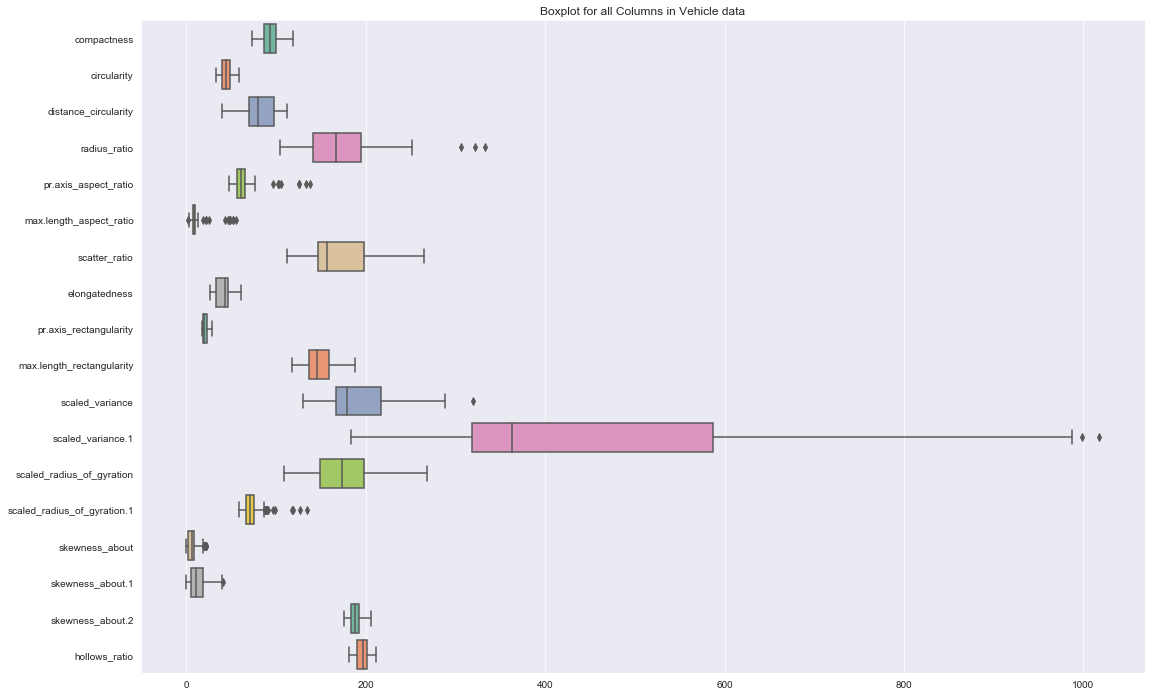

In [73]:
## boxplot for outliers detection
figsize_x = 18
figsize_y = 12
f,ax = plt.subplots(figsize=(figsize_x,figsize_y))
sns.boxplot(data=vehicles_df, orient="h", palette="Set2", ax =ax)
ax.set_title("Boxplot for all Columns in Vehicle data")
plt.show();

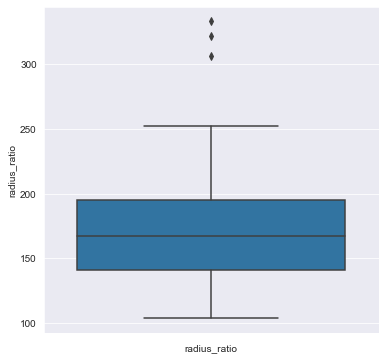

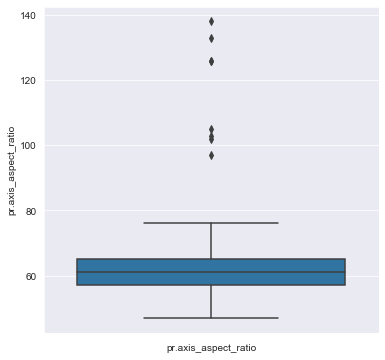

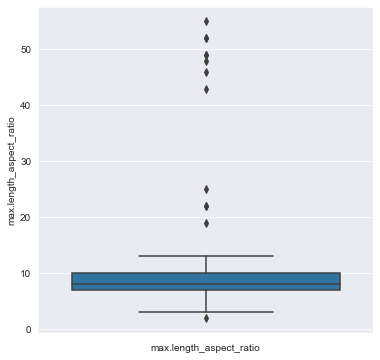

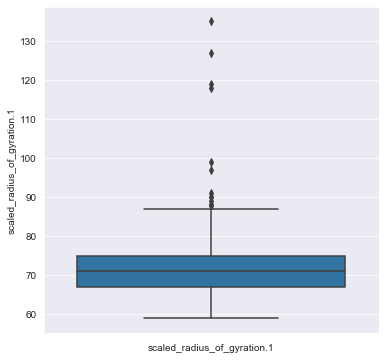

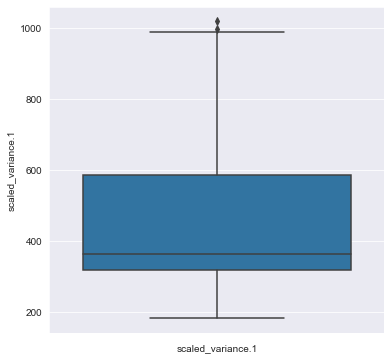

In [74]:
column_name = ["radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio",
               "scaled_radius_of_gyration.1","scaled_variance.1"]

for cols in column_name:
    f,ax = plt.subplots(figsize=(6,6))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    sns.boxplot(y=cols, data=vehicles_df, ax=ax)
    ax.set(xlabel=cols)
    plt.show()

In [75]:
## remove the outliers; assuming that they will have not any impact due to information loss since the count is low.
vehicles_df = vehicles_df[vehicles_df["radius_ratio"] < 250]
vehicles_df = vehicles_df[vehicles_df["pr.axis_aspect_ratio"] < 80]
vehicles_df = vehicles_df[vehicles_df["max.length_aspect_ratio"] < 18]
vehicles_df = vehicles_df[vehicles_df["scaled_radius_of_gyration.1"] <87]
vehicles_df = vehicles_df[vehicles_df["scaled_variance.1"] < 950]

In [76]:
vehicles_df.shape

(809, 19)

In [77]:
## rest the index post cleaning the outliers
vehicles_df = vehicles_df.reset_index(drop=True)

### Q2:  Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [78]:
veh_corr_df = vehicles_df.copy()

In [79]:
veh_corr_df.drop("class", axis=1, inplace=True)

In [80]:
## corelation Map 
corr = veh_corr_df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1,0.68,0.78,0.75,0.22,0.53,0.8,-0.78,0.81,0.67,0.78,0.81,0.57,-0.28,0.23,0.14,0.31,0.4
circularity,0.68,1,0.79,0.65,0.22,0.59,0.85,-0.82,0.85,0.96,0.81,0.84,0.93,0.06,0.15,-0.03,-0.11,0.06
distance_circularity,0.78,0.79,1,0.81,0.26,0.69,0.91,-0.91,0.9,0.77,0.89,0.9,0.7,-0.25,0.1,0.25,0.13,0.34
radius_ratio,0.75,0.65,0.81,1,0.67,0.47,0.81,-0.85,0.78,0.58,0.81,0.8,0.56,-0.4,0.05,0.17,0.41,0.51
pr.axis_aspect_ratio,0.22,0.22,0.26,0.67,1,0.12,0.24,-0.33,0.21,0.17,0.26,0.23,0.19,-0.29,-0.06,-0.04,0.38,0.39
max.length_aspect_ratio,0.53,0.59,0.69,0.47,0.12,1,0.55,-0.53,0.55,0.67,0.46,0.51,0.45,-0.3,0.11,0.14,0.03,0.38
scatter_ratio,0.8,0.85,0.91,0.81,0.24,0.55,1,-0.97,0.99,0.81,0.98,0.99,0.79,-0.03,0.07,0.2,0.02,0.16
elongatedness,-0.78,-0.82,-0.91,-0.85,-0.33,-0.53,-0.97,1,-0.95,-0.77,-0.97,-0.96,-0.76,0.1,-0.04,-0.17,-0.11,-0.24
pr.axis_rectangularity,0.81,0.85,0.9,0.78,0.21,0.55,0.99,-0.95,1,0.81,0.96,0.99,0.78,-0.02,0.08,0.21,-0.01,0.14
max.length_rectangularity,0.67,0.96,0.77,0.58,0.17,0.67,0.81,-0.77,0.81,1,0.75,0.8,0.87,0.04,0.14,-0.02,-0.11,0.09


##### pr.axis_aspect_ratio and max.length_aspect_ratio donot have corelation with any other columns apart from themselves.

##### scaled_radius_of_gyration.1 has high negative corealtion with skewness_about.2 and hollows_ratio columns. it has very less corelation with others

##### hollows_ratio has high corelation with skewness_about.2 and scaled_radius_of_gyration

##### many columns have high corelation amongst each other

#####  'skewness_about', 'skewness_about.1' columns donot have corelation with any other column and hence we will not apply PCA on those columns as well but include them as features in our model.

##### Hollows_ratio has got high corelation column skewness_about.2 and scaled_radius_of_gyration.1. So we will be use only Hollow_ratio column and drop skewness_about.2 and scaled_radius_of_gyration.1 assuming that the information contained in hollow_ratio column will also cover information contained in skewness_about.2 and scaled_radius_of_gyration.1 column

##### Hollow Ratio is not corelated to any other columns and hence we will not apply PCA on it but consider it as a feature in our model.



### Q3 :  Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [81]:
x_columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']
y_columns = ['class']


## Create the Feature and Prediction Dataframe
X = vehicles_df[x_columns]
Y = vehicles_df[y_columns]

In [82]:
## convert class column from category to numerical values
vehicles_df["class"] = vehicles_df["class"].astype("category")
vehicles_df["class"] = vehicles_df["class"].cat.codes
vehicles_df["class"] = vehicles_df["class"].astype("int64")


In [83]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 19 columns):
compactness                    809 non-null int64
circularity                    809 non-null int64
distance_circularity           809 non-null int64
radius_ratio                   809 non-null int64
pr.axis_aspect_ratio           809 non-null int64
max.length_aspect_ratio        809 non-null int64
scatter_ratio                  809 non-null int64
elongatedness                  809 non-null int64
pr.axis_rectangularity         809 non-null int64
max.length_rectangularity      809 non-null int64
scaled_variance                809 non-null int64
scaled_variance.1              809 non-null int64
scaled_radius_of_gyration      809 non-null int64
scaled_radius_of_gyration.1    809 non-null int64
skewness_about                 809 non-null int64
skewness_about.1               809 non-null int64
skewness_about.2               809 non-null int64
hollows_ratio                  809 non-null i

In [85]:
# Store features high corelation and low corelation column names
high_cor_cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']

low_cor_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio','skewness_about', 'skewness_about.1','hollows_ratio']

In [86]:
## Scale the data using Standard Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [88]:
## Apply PCA on high Corelation columns
from sklearn.decomposition import PCA

X = X_std[high_cor_cols]

# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=0.95, whiten=True)

X_pca = pca.fit_transform(X)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 11
Reduced number of features: 4


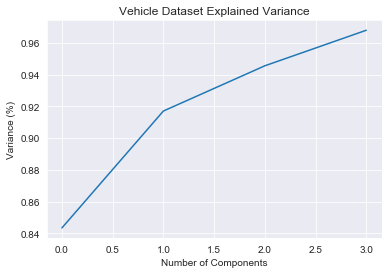

In [89]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show();

### Q4: Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [91]:
## Split the train and test data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Train Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

Score on Train Data 0.8462897526501767
Score on Test Data 0.8065843621399177
Confusion Matrix:
 [[35 14  2]
 [17 99  2]
 [ 3  9 62]]
              precision    recall  f1-score   support

         bus       0.69      0.64      0.66        55
         car       0.84      0.81      0.82       122
         Van       0.84      0.94      0.89        66

    accuracy                           0.81       243
   macro avg       0.79      0.80      0.79       243
weighted avg       0.80      0.81      0.80       243



C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
# Grid Search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
# Parameter Grid

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 1, 'kernel': 'linear'}
Best Estimators:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


In [96]:
#Using best estimators --

svc_model = SVC (C =1, degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Train Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

Score on Train Data 0.8692579505300353
Score on Test Data 0.831275720164609
Confusion Matrix:
 [[ 40  13   2]
 [ 13 103   5]
 [  2   6  59]]
              precision    recall  f1-score   support

         bus       0.73      0.73      0.73        55
         car       0.85      0.84      0.85       122
         Van       0.88      0.89      0.89        66

    accuracy                           0.83       243
   macro avg       0.82      0.82      0.82       243
weighted avg       0.83      0.83      0.83       243



# Score increases from 80.6% to 83.1 %
# Bus precision increased 